In [342]:
import pandas as pd
from urllib.request import urlopen  
import os.path as osp
import os
import logging
import zipfile
from glob import glob
logging.getLogger().setLevel('INFO')

## Helpers

In [343]:
def download_file(url_str, path):
    url = urlopen(url_str)
    output = open(path, 'wb')       
    output.write(url.read())
    output.close()  
    
def extract_file(archive_path, target_dir):
    zip_file = zipfile.ZipFile(archive_path, 'r')
    zip_file.extractall(target_dir)
    zip_file.close()

## Download the dataset

In [344]:
BASE_URL = 'http://tennis-data.co.uk'
DATA_DIR = "tennis_data"
ATP_DIR = './{}/ATP'.format(DATA_DIR)
WTA_DIR = './{}/WTA'.format(DATA_DIR)

ATP_URLS = [BASE_URL + "/%i/%i.zip" % (i,i) for i in range(2000,2019)]
WTA_URLS = [BASE_URL + "/%iw/%i.zip" % (i,i) for i in range(2007,2019)]

os.makedirs(osp.join(ATP_DIR, 'archives'), exist_ok=True)
os.makedirs(osp.join(WTA_DIR, 'archives'), exist_ok=True)

for files, directory in ((ATP_URLS, ATP_DIR), (WTA_URLS, WTA_DIR)):
    for dl_path in files:
        logging.info("downloading & extracting file %s", dl_path)
        archive_path = osp.join(directory, 'archives', osp.basename(dl_path))
        download_file(dl_path, archive_path)
        extract_file(archive_path, directory)
    
ATP_FILES = sorted(glob("%s/*.xls*" % ATP_DIR))
WTA_FILES = sorted(glob("%s/*.xls*" % WTA_DIR))

df_atp = pd.concat([pd.read_excel(f) for f in ATP_FILES], ignore_index=True)
df_wta = pd.concat([pd.read_excel(f) for f in WTA_FILES], ignore_index=True)

logging.info("%i matches ATP in df_atp", df_atp.shape[0])
logging.info("%i matches WTA in df_wta", df_wta.shape[0])

INFO:root:downloading & extracting file http://tennis-data.co.uk/2000/2000.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2001/2001.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2002/2002.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2003/2003.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2004/2004.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2005/2005.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2006/2006.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2007/2007.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2008/2008.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2009/2009.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2010/2010.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2011/2011.zip
INFO:root:downloading & extracting file http://tenni

## Your work

## Analyse descriptive sur df_atp

In [345]:
df_atp.shape

(52298, 54)

In [346]:
df_atp.head()

,ATP,AvgL,AvgW,B&WL,B&WW,B365L,B365W,Best of,CBL,CBW,...,UBW,W1,W2,W3,W4,W5,WPts,WRank,Winner,Wsets
0,1,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,...,NaN,6.0,6,NaN,NaN,NaN,NaN,63,Dosedel S.,2.0
1,1,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,...,NaN,6.0,6,NaN,NaN,NaN,NaN,5,Enqvist T.,2.0
2,1,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,...,NaN,6.0,7,6,NaN,NaN,NaN,40,Escude N.,2.0
3,1,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,...,NaN,6.0,6,NaN,NaN,NaN,NaN,65,Federer R.,2.0
4,1,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,...,NaN,7.0,5,6,NaN,NaN,NaN,81,Fromberg R.,2.0


In [347]:
df_atp.describe()

,ATP,AvgL,AvgW,B&WL,B&WW,B365L,B365W,Best of,CBL,CBW,...,SBW,SJL,SJW,UBL,UBW,W1,W4,W5,WPts,Wsets
count,52298.000000,22745.000000,22745.000000,1097.000000,1097.000000,43666.000000,43643.000000,52298.000000,17506.000000,17506.000000,...,5424.000000,15579.000000,15572.000000,10671.000000,10671.000000,52035.000000,4731.000000,1791.000000,36094.000000,52074.000000
mean,33.222532,3.594448,1.834821,2.547347,1.728633,3.551805,1.823768,3.372366,3.000658,1.812080,...,1.793035,3.557943,1.796538,3.542479,1.815867,5.794331,5.777003,6.637633,1831.891644,2.141760
std,18.115493,3.282610,1.107884,1.330386,0.730434,3.527564,1.100806,0.778516,2.032791,0.868254,...,0.751026,3.272510,1.004273,3.646316,0.996238,1.239577,1.274712,2.290596,2294.307489,0.460311
min,1.000000,1.010000,1.010000,1.020000,1.010000,1.002000,1.000000,3.000000,1.020000,1.000000,...,0.000000,1.010000,1.000000,1.020000,1.010000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,19.000000,1.740000,1.240000,1.600000,1.250000,1.720000,1.222000,3.000000,1.720000,1.280000,...,1.333000,1.730000,1.220000,1.750000,1.240000,6.000000,6.000000,6.000000,640.000000,2.000000
50%,33.000000,2.550000,1.500000,2.150000,1.500000,2.500000,1.500000,3.000000,2.375000,1.550000,...,1.571000,2.630000,1.500000,2.500000,1.500000,6.000000,6.000000,6.000000,1007.000000,2.000000
75%,49.000000,3.990000,2.060000,3.100000,1.950000,4.000000,2.075000,3.000000,3.400000,2.050000,...,2.100000,4.000000,2.000000,3.850000,2.030000,6.000000,6.000000,7.000000,1895.000000,2.000000
max,69.000000,36.440000,23.450000,9.000000,7.500000,101.000000,29.000000,5.000000,25.000000,14.000000,...,9.000000,81.000000,19.000000,60.000000,18.000000,7.000000,7.000000,70.000000,16950.000000,3.000000


In [348]:
df_atp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52298 entries, 0 to 52297
Data columns (total 54 columns):
ATP           52298 non-null int64
AvgL          22745 non-null float64
AvgW          22745 non-null float64
B&WL          1097 non-null float64
B&WW          1097 non-null float64
B365L         43666 non-null float64
B365W         43643 non-null float64
Best of       52298 non-null int64
CBL           17506 non-null float64
CBW           17506 non-null float64
Comment       52298 non-null object
Court         52298 non-null object
Date          52298 non-null datetime64[ns]
EXL           39416 non-null float64
EXW           39411 non-null object
GBL           5055 non-null float64
GBW           5055 non-null float64
IWL           13358 non-null float64
IWW           13358 non-null float64
L1            52037 non-null float64
L2            51527 non-null object
L3            24168 non-null object
L4            4731 non-null float64
L5            1791 non-null float64
LBL        

## Analyse descriptive sur df_wta

In [349]:
df_wta.shape

(29581, 42)

In [350]:
df_wta.head()

,AvgL,AvgW,B365L,B365W,Best of,CBL,CBW,Comment,Court,Date,...,UBL,UBW,W1,W2,W3,WPts,WRank,WTA,Winner,Wsets
0,NaN,NaN,3,1.33,3,2.90,1.38,Completed,Outdoor,2007-01-01,...,3.05,1.35,6.0,6.0,NaN,332.25,81.0,1,Sun T.T.,2.0
1,NaN,NaN,1.22,3.75,3,1.18,4.50,Completed,Outdoor,2007-01-01,...,1.25,3.75,6.0,6.0,6.0,401.75,59.0,1,Dulko G.,2.0
2,NaN,NaN,2,1.72,3,1.85,1.90,Completed,Outdoor,2007-01-01,...,NaN,NaN,6.0,6.0,NaN,418.50,56.0,1,Loit E.,2.0
3,NaN,NaN,1.83,1.83,3,1.66,2.15,Completed,Outdoor,2007-01-01,...,NaN,NaN,7.0,6.0,NaN,365.50,70.0,1,Craybas J.,2.0
4,NaN,NaN,4.5,1.16,3,4.85,1.16,Completed,Outdoor,2007-01-01,...,4.30,1.20,7.0,6.0,NaN,951.00,18.0,1,Bartoli M.,2.0


In [351]:
df_wta.describe()

,AvgL,AvgW,B365W,Best of,CBL,CBW,EXL,L1,L2,L3,...,SJW,UBL,UBW,W1,W2,W3,WPts,WRank,WTA,Wsets
count,21356.000000,21356.000000,29344.000000,29581.000000,2428.000000,2428.000000,28833.000000,29405.000000,29110.000000,9349.000000,...,14139.000000,6921.000000,6921.000000,29405.000000,29111.000000,9349.000000,29543.000000,29543.000000,29581.000000,29407.000000
mean,3.117665,1.855391,1.845174,3.000068,3.669650,1.765894,3.070021,3.571808,3.395156,3.132421,...,1.823464,3.535570,1.812594,5.715287,5.709835,6.192213,1884.599897,57.566361,28.301410,1.962186
std,2.313865,0.971865,1.062936,0.011628,2.737051,1.027977,2.083360,1.940725,1.962596,1.692696,...,0.983359,3.021532,1.045906,1.271882,1.267732,0.680399,1881.278074,64.991961,15.753726,0.224945
min,1.010000,1.010000,1.000000,3.000000,1.020000,1.010000,1.010000,0.000000,0.000000,0.000000,...,1.007000,1.010000,1.010000,0.000000,0.000000,0.000000,4.000000,1.000000,1.000000,0.000000
25%,1.710000,1.280000,1.250000,3.000000,1.800000,1.180000,1.700000,2.000000,2.000000,2.000000,...,1.250000,1.770000,1.220000,6.000000,6.000000,6.000000,708.500000,17.000000,15.000000,2.000000
50%,2.410000,1.550000,1.500000,3.000000,2.700000,1.430000,2.400000,3.000000,3.000000,3.000000,...,1.500000,2.600000,1.470000,6.000000,6.000000,6.000000,1215.000000,40.000000,28.000000,2.000000
75%,3.570000,2.100000,2.100000,3.000000,4.500000,1.950000,3.600000,5.000000,5.000000,4.000000,...,2.100000,4.100000,2.000000,6.000000,6.000000,6.000000,2345.000000,78.000000,42.000000,2.000000
max,41.800000,20.140000,23.000000,5.000000,16.000000,14.000000,24.000000,7.000000,7.000000,14.000000,...,17.000000,54.000000,20.000000,7.000000,7.000000,16.000000,13615.000000,1208.000000,61.000000,2.000000


In [352]:
df_wta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29581 entries, 0 to 29580
Data columns (total 42 columns):
AvgL          21356 non-null float64
AvgW          21356 non-null float64
B365L         29346 non-null object
B365W         29344 non-null float64
Best of       29581 non-null int64
CBL           2428 non-null float64
CBW           2428 non-null float64
Comment       29581 non-null object
Court         29581 non-null object
Date          29579 non-null datetime64[ns]
EXL           28833 non-null float64
EXW           28834 non-null object
L1            29405 non-null float64
L2            29110 non-null float64
L3            9349 non-null float64
LBL           26210 non-null float64
LBW           26210 non-null object
LPts          29502 non-null float64
LRank         29502 non-null float64
Location      29581 non-null object
Loser         29581 non-null object
Lsets         29407 non-null float64
MaxL          21356 non-null float64
MaxW          21356 non-null float64
PSL     

## Questions :

#### 1. Who are the three ATP players with the most wins ?

In [353]:
df_atp.groupby('Winner').size().sort_values(ascending=False)[:3]

Winner
Federer R.     1121
Nadal R.        891
Djokovic N.     802
dtype: int64

#### 2. How many sets did the player “ Federer R.” win in total ?

In [354]:
win = df_atp[df_atp.Winner == 'Federer R.'].Wsets.sum()
lose = df_atp[df_atp.Loser == 'Federer R.'].Lsets.replace('`','',regex=True).dropna().astype(int).sum()
print(win + lose)

2696.0


#### 3. How many sets did the player “ Federer R.” win during the years 2016 and 2017 ?

In [355]:
df_1617 = df_atp[df_atp.Date.between('2016', '2017-12-31')]
win = df_1617[df_1617.Winner == 'Federer R.'].Wsets.sum()
lose = df_1617[df_1617.Loser == 'Federer R.'].Lsets.sum()
print(win + lose)
del df_1617

182.0


#### 4. For each match, what is the percentage of victories of the winner in the past ?

In [356]:
import numpy as np

b = np.empty(len(df_atp))
#boucle en utilisant l'index car avant 2003 un joueur peut avoir plusieurs match a la meme date mais l'index est par ordre chronologique
#temps de calcul long (+/- !!10 min !) mais je n'ai pas encore trouve d'optimisation avec pandas ou numpy sans faire de boucle
for i in range(df_atp.shape[0]):
    w = df_atp.loc[i].Winner
    try:
        b[i] = df_atp[(df_atp.index < i) & (df_atp.Winner == w)].shape[0] / (df_atp[(df_atp.index < i) & (df_atp.Winner == w)].shape[0] + df_atp[(df_atp.index < i) & (df_atp.Loser == w)].shape[0])
    except ZeroDivisionError:
        b[i] = np.nan

df_atp['W_%'] = b        
print(b)
print(df_atp[(df_atp['Winner']=='Federer R.') | (df_atp['Loser']=='Federer R.')].head(10))

[       nan        nan        nan ... 0.66535433 0.83005181 0.66666667]
     ATP  AvgL  AvgW  B&WL  B&WW  B365L  B365W  Best of  CBL  CBW    ...     \
3      1   NaN   NaN   NaN   NaN    NaN    NaN        3  NaN  NaN    ...      
16     1   NaN   NaN   NaN   NaN    NaN    NaN        3  NaN  NaN    ...      
96     4   NaN   NaN   NaN   NaN    NaN    NaN        3  NaN  NaN    ...      
168    6   NaN   NaN   NaN   NaN    NaN    NaN        5  NaN  NaN    ...      
229    6   NaN   NaN   NaN   NaN    NaN    NaN        5  NaN  NaN    ...      
253    6   NaN   NaN   NaN   NaN    NaN    NaN        5  NaN  NaN    ...      
316    8   NaN   NaN   NaN   NaN    NaN    NaN        3  NaN  NaN    ...      
329    8   NaN   NaN   NaN   NaN    NaN    NaN        3  NaN  NaN    ...      
337    8   NaN   NaN   NaN   NaN    NaN    NaN        3  NaN  NaN    ...      
341    8   NaN   NaN   NaN   NaN    NaN    NaN        3  NaN  NaN    ...      

      W1 W2   W3  W4  W5  WPts  WRank        Winner  Wsets

## Preparation des donnees

#### On ajoute le pourcentage de victoire du perdant : (attention +/- 15min)

In [357]:
b = np.empty(len(df_atp))
for i in range(df_atp.shape[0]):
    w = df_atp.loc[i].Loser
    try:
        b[i] = df_atp[(df_atp.index < i) & (df_atp.Loser == w)].shape[0] / (df_atp[(df_atp.index < i) & (df_atp.Winner == w)].shape[0] + df_atp[(df_atp.index < i) & (df_atp.Loser == w)].shape[0])
    except ZeroDivisionError:
        b[i] = np.nan
        
df_atp['L_%'] = b
del b

#### Meme chose pour df_wta : (attention 15min)

In [358]:
# Vainqueur
b = np.empty(len(df_wta))
for i in range(df_wta.shape[0]):
    w = df_wta.loc[i].Winner
    try:
        b[i] = df_wta[(df_wta.index < i) & (df_wta.Winner == w)].shape[0] / (df_wta[(df_wta.index < i) & (df_wta.Winner == w)].shape[0] + df_wta[(df_wta.index < i) & (df_wta.Loser == w)].shape[0])
    except ZeroDivisionError:
        b[i] = np.nan

df_wta['W_%'] = b 

# Perdant
b = np.empty(len(df_wta))
for i in range(df_wta.shape[0]):
    w = df_wta.loc[i].Loser
    try:
        b[i] = df_wta[(df_wta.index < i) & (df_wta.Loser == w)].shape[0] / (df_wta[(df_wta.index < i) & (df_wta.Winner == w)].shape[0] + df_wta[(df_wta.index < i) & (df_wta.Loser == w)].shape[0])
    except ZeroDivisionError:
        b[i] = np.nan
        
df_wta['L_%'] = b
del b

#### On supprime les lignes avec des match non 'completed' :

In [359]:
df_atp = df_atp.drop(df_atp[df_atp.Comment != 'Completed'].index)

In [360]:
df_wta = df_wta.drop(df_wta[df_wta.Comment != 'Completed'].index)

#### On cree une variable qui est la moyenne des cotes :

In [361]:
df_atp['WOdds'] = df_atp.loc[:,['B&WW','B365W','CBW','EXW','GBW','IWW','LBW','PSW','SBW','SJW','UBW']].mean(axis=1)
df_atp['LOdds'] = df_atp.loc[:,['B&WL','B365L','CBL','EXL','GBL','IWL','LBL','PSL','SBL','SJL','UBL']].mean(axis=1)

In [362]:
df_wta['WOdds'] = df_wta.loc[:,['B365W','CBW','EXW','LBW','PSW','SJW','UBW']].mean(axis=1)
df_wta['LOdds'] = df_wta.loc[:,['B365L','CBL','EXL','LBL','PSL','SJL','UBL']].mean(axis=1)

#### On binarise les donnees categorielles :

In [363]:
df_atp = pd.concat([df_atp,pd.get_dummies(df_atp.Court)],sort=True,axis=1)
df_atp = pd.concat([df_atp,pd.get_dummies(df_atp.Location)],sort=True,axis=1)
df_atp = pd.concat([df_atp,pd.get_dummies(df_atp.Round)],sort=True,axis=1)
df_atp = pd.concat([df_atp,pd.get_dummies(df_atp.Series)],sort=True,axis=1)
df_atp = pd.concat([df_atp,pd.get_dummies(df_atp.Surface)],sort=True,axis=1)
df_atp = pd.concat([df_atp,pd.get_dummies(df_atp.Tournament)],sort=True,axis=1)

In [364]:
df_wta = pd.concat([df_wta,pd.get_dummies(df_wta.Court)],sort=True,axis=1)
df_wta = pd.concat([df_wta,pd.get_dummies(df_wta.Location)],sort=True,axis=1)
df_wta = pd.concat([df_wta,pd.get_dummies(df_wta.Round)],sort=True,axis=1)
df_wta = pd.concat([df_wta,pd.get_dummies(df_wta.Surface)],sort=True,axis=1)
df_wta = pd.concat([df_wta,pd.get_dummies(df_wta.Tier)],sort=True,axis=1)
df_wta = pd.concat([df_wta,pd.get_dummies(df_wta.Tournament)],sort=True,axis=1)

#### On cree les colonnes Joueurs 1 et 2 :

In [366]:
b = np.random.randint(1,3,len(df_atp))
df_atp['Select'] = b
df_atp['J1'] = np.where(df_atp.Select == 1, df_atp.Winner, df_atp.Loser)
df_atp['J2'] = np.where(df_atp.Select == 2, df_atp.Winner, df_atp.Loser)

In [367]:
b = np.random.randint(1,3,len(df_wta))
df_wta['Select'] = b
df_wta['J1'] = np.where(df_wta.Select == 1, df_wta.Winner, df_wta.Loser)
df_wta['J2'] = np.where(df_wta.Select == 2, df_wta.Winner, df_wta.Loser)

#### On remplace ensuite ce qui donnait une information sur le vainqueur par des variables J1 et J2, et on remplace les valeurs manquantes :

In [368]:
df_atp['Rank_J1'] = np.where(df_atp.Select == 1, df_atp.WRank, df_atp.LRank)
df_atp['Rank_J1'] = df_atp['Rank_J1'].replace('NR',np.nan)
df_atp['Rank_J2'] = np.where(df_atp.Select == 2, df_atp.WRank, df_atp.LRank)
df_atp['Rank_J2'] = df_atp['Rank_J2'].replace('NR',np.nan)
df_atp['Rank_J1']=df_atp['Rank_J1'].fillna(df_atp['Rank_J2'].max())
df_atp['Rank_J2']=df_atp['Rank_J2'].fillna(df_atp['Rank_J2'].max())
df_atp['Pts_J1'] = np.where(df_atp.Select == 1, df_atp.WPts, df_atp.LPts)
df_atp['Pts_J1'] = df_atp['Pts_J1'].fillna(0)
df_atp['Pts_J2'] = np.where(df_atp.Select == 2, df_atp.WPts, df_atp.LPts)
df_atp['Pts_J2'] = df_atp['Pts_J2'].fillna(0)
df_atp['Odds_J1'] = np.where(df_atp.Select == 1, df_atp.WOdds, df_atp.LOdds)
df_atp['Odds_J1'] = df_atp['Odds_J1'].fillna(1)
df_atp['Odds_J2'] = np.where(df_atp.Select == 2, df_atp.WOdds, df_atp.LOdds)
df_atp['Odds_J2'] = df_atp['Odds_J2'].fillna(1)
df_atp['Victory%_J1'] = np.where(df_atp.Select == 1, df_atp['W_%'], df_atp['L_%'])
df_atp['Victory%_J1'] = df_atp['Victory%_J1'].fillna(0)
df_atp['Victory%_J2'] = np.where(df_atp.Select == 2, df_atp['W_%'], df_atp['L_%'])
df_atp['Victory%_J2'] = df_atp['Victory%_J2'].fillna(0)

In [369]:
df_wta['Rank_J1'] = np.where(df_wta.Select == 1, df_wta.WRank, df_wta.LRank)
df_wta['Rank_J1'] = df_wta['Rank_J1'].replace('NR',np.nan)
df_wta['Rank_J2'] = np.where(df_wta.Select == 2, df_wta.WRank, df_wta.LRank)
df_wta['Rank_J2'] = df_wta['Rank_J2'].replace('NR',np.nan)
df_wta['Rank_J1'] = df_wta['Rank_J1'].fillna(df_wta['Rank_J1'].max())
df_wta['Rank_J2'] = df_wta['Rank_J2'].fillna(df_wta['Rank_J1'].max())
df_wta['Pts_J1'] = np.where(df_wta.Select == 1, df_wta.WPts, df_wta.LPts)
df_wta['Pts_J1'] = df_wta['Pts_J1'].fillna(0)
df_wta['Pts_J2'] = np.where(df_wta.Select == 2, df_wta.WPts, df_wta.LPts)
df_wta['Pts_J2'] = df_wta['Pts_J2'].fillna(0)
df_wta['Odds_J1'] = np.where(df_wta.Select == 1, df_wta.WOdds, df_wta.LOdds)
df_wta['Odds_J1'] = df_wta['Odds_J1'].fillna(1)
df_wta['Odds_J2'] = np.where(df_wta.Select == 2, df_wta.WOdds, df_wta.LOdds)
df_wta['Odds_J2'] = df_wta['Odds_J2'].fillna(1)
df_wta['Victory%_J1'] = np.where(df_wta.Select == 1, df_wta['W_%'], df_wta['L_%'])
df_wta['Victory%_J1'] = df_wta['Victory%_J1'].fillna(0)
df_wta['Victory%_J2'] = np.where(df_wta.Select == 2, df_wta['W_%'], df_wta['L_%'])
df_wta['Victory%_J2'] = df_wta['Victory%_J2'].fillna(0)

#### Enfin on transforme la variable victoire en Y=0 si joueur 1 gagne et Y=1 sinon :

In [370]:
df_atp['Y'] = np.where(df_atp.J1 == df_atp.Winner, 0, 1)

In [371]:
df_wta['Y'] = np.where(df_wta.J1 == df_wta.Winner, 0, 1)

#### On supprime les colonnes qui contiennent l'info sur le vainqueur ou n'etant plus utiles :

In [372]:
to_del = ['AvgL', 'AvgW', 'B&WL', 'B&WW', 'B365L', 'B365W','CBL', 'CBW','Comment','Court','EXL', 'EXW', 'GBL', 'GBW','IWL', 'IWW', 'L1', 'L2', 'L3', 'L4', 'L5', 'LBL', 'LBW','Location','LPts','LRank', 'Loser', 'Lsets', 'MaxL', 'MaxW', 'PSL', 'PSW','Round','SBL', 'SBW','Series','SJL', 'SJW','Surface','Tournament','UBL', 'UBW', 'W1', 'W2', 'W3', 'W4', 'W5', 'WPts', 'WRank', 'Winner','Wsets','W_%', 'L_%', 'WOdds', 'LOdds', 'Select']
df_atp2 = df_atp.drop(columns=to_del)

In [373]:
to_del = ['AvgL', 'AvgW', 'B365L', 'B365W','CBL', 'CBW','Comment','Court','EXL', 'EXW', 'L1', 'L2', 'L3', 'L4', 'L5', 'LBL', 'LBW','Location','LPts','LRank', 'Loser', 'Lsets', 'MaxL', 'MaxW', 'PSL', 'PSW','Round','SJL', 'SJW','Surface','Tier','Tournament','UBL', 'UBW', 'W1', 'W2', 'W3', 'W4', 'W5', 'WPts', 'WRank', 'Winner','Wsets','W_%', 'L_%','WOdds', 'LOdds', 'Select']
df_wta2 = df_wta.drop(columns=to_del)

#### On separe en train/test :

In [374]:
df_atp_train = df_atp2[df_atp2.Date.between('2000','2016-12-31')]
df_atp_test = df_atp2[df_atp2.Date.between('2017','2017-12-31')]

In [375]:
df_wta_train = df_wta2[df_wta2.Date.between('2007','2016-12-31')]
df_wta_test = df_wta2[df_wta2.Date.between('2017','2017-12-31')]

## Modelisation et prediction pour les hommes

### Regression logistique

In [390]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

X_Train = df_atp_train.drop(columns=['Y','J1','J2','Date'])
X_Test = df_atp_test.drop(columns=['Y','J1','J2','Date'])

model = LogisticRegression()
model.fit(X_Train,df_atp_train['Y'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### Sur le train, matrice de confusion et taux de prediction :

In [391]:
predTrain = model.predict(X_Train)

mcTrain = metrics.confusion_matrix(df_atp_train['Y'],predTrain)
print(mcTrain)

print(metrics.accuracy_score(df_atp_train['Y'],predTrain))

[[15581  6944]
 [ 6687 16061]]
0.6989154683807126


#### Sur le test, matrice de confusion et taux de prediction :

In [392]:
predTest = model.predict(X_Test)

mcTest = metrics.confusion_matrix(df_atp_test['Y'],predTest)
print(mcTest)

print(metrics.accuracy_score(df_atp_test['Y'],predTest))

[[853 414]
 [401 864]]
0.6781200631911533


#### A titre de comparaison, on calcule les taux de prediction en se fiant uniquement au classement du joueur et a son taux de victoire :

In [393]:
c = np.where(df_atp_test['Rank_J1'] < df_atp_test['Rank_J2'], 0, 1)
print('Classement : ',metrics.accuracy_score(df_atp_test['Y'],c))

v = np.where(df_atp_test['Victory%_J1'] > df_atp_test['Victory%_J2'], 0, 1)
print('Victoire : ',metrics.accuracy_score(df_atp_test['Y'],v))

Classement :  0.6548183254344392
Victoire :  0.47709320695102686


### Random Forest

In [394]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf_rf = RandomForestClassifier(n_estimators=30,max_depth = 200)
clf_rf.fit(X_Train, df_atp_train['Y'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=200, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

#### Sur le train, matrice de confusion et taux de prediction :

In [395]:
predTrain = clf_rf.predict(X_Train)
print(metrics.accuracy_score(df_atp_train['Y'], predTrain))
mcTest_rf = metrics.confusion_matrix(df_atp_train['Y'], predTrain)
print(mcTest_rf)

0.9998674706778875
[[22524     1]
 [    5 22743]]


#### Sur le test, matrice de confusion et taux de prediction :

In [396]:
predTest = clf_rf.predict(X_Test)
print(metrics.accuracy_score(df_atp_test['Y'], predTest))
mcTest_rf = metrics.confusion_matrix(df_atp_test['Y'], predTest)
print(mcTest_rf)

0.9040284360189573
[[1168   99]
 [ 144 1121]]


### Courbe ROC

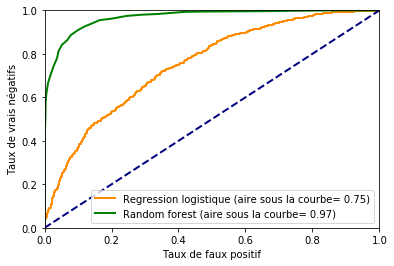

In [398]:
%matplotlib inline
import matplotlib.pyplot as plt

scores_logistic = model.predict_proba(X_Test)
fpr_logistic, tpr_logistic, thresholds_logistic = metrics.roc_curve(df_atp_test['Y'],scores_logistic[:,1],pos_label=1)
roc_auc_logistic=metrics.auc(fpr_logistic,tpr_logistic)

scores_rf = clf_rf.predict_proba(X_Test)
fpr_rf, tpr_rf, thresholds_rf = metrics.roc_curve(df_atp_test['Y'],scores_rf[:,1],pos_label=1)
roc_auc_rf=metrics.auc(fpr_rf,tpr_rf)

plt.figure()
lw=2
plt.plot(fpr_logistic,tpr_logistic,color='darkorange',lw=lw,label='Regression logistique (aire sous la courbe= %0.2f)'%roc_auc_logistic)
plt.plot(fpr_rf,tpr_rf,color='green',lw=lw,label='Random forest (aire sous la courbe= %0.2f)'%roc_auc_rf)

plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('Taux de faux positif')
plt.ylabel('Taux de vrais négatifs')
plt.legend(loc="lower right")
plt.show()

## Modelisation et prediction pour les femmes

### Regression logistique

In [400]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

X_Train = df_wta_train.drop(columns=['Y','J1','J2','Date'])
X_Test = df_wta_test.drop(columns=['Y','J1','J2','Date'])

model = LogisticRegression()
model.fit(X_Train,df_wta_train['Y'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### Sur le train, matrice de confusion et taux de prediction :

In [401]:
predTrain = model.predict(X_Train)

mcTrain = metrics.confusion_matrix(df_wta_train['Y'],predTrain)
print(mcTrain)

print(metrics.accuracy_score(df_wta_train['Y'],predTrain))

[[8306 3590]
 [3502 8313]]
0.7008983172367256


#### Sur le test, matrice de confusion et taux de prediction :

In [402]:
predTest = model.predict(X_Test)

mcTest = metrics.confusion_matrix(df_wta_test['Y'],predTest)
print(mcTest)

print(metrics.accuracy_score(df_wta_test['Y'],predTest))

[[798 409]
 [396 814]]
0.6669424906909391


#### A titre de comparaison, on calcule les taux de prediction en se fiant uniquement au classement de la joueuse et a son taux de victoire :

In [403]:
c = np.where(df_wta_test['Rank_J1'] < df_wta_test['Rank_J2'], 0, 1)
print('Classement : ',metrics.accuracy_score(df_wta_test['Y'],c))

v = np.where(df_wta_test['Victory%_J1'] > df_wta_test['Victory%_J2'], 0, 1)
print('Victoire : ',metrics.accuracy_score(df_wta_test['Y'],v))

Classement :  0.6321886636326024
Victoire :  0.508067852709971


### Random Forest

In [404]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf_rf = RandomForestClassifier(n_estimators=30,max_depth = 200)
clf_rf.fit(X_Train, df_wta_train['Y'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=200, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

#### Sur le train, matrice de confusion et taux de prediction :

In [405]:
predTrain = clf_rf.predict(X_Train)
print(metrics.accuracy_score(df_wta_train['Y'], predTrain))
mcTest_rf = metrics.confusion_matrix(df_wta_train['Y'], predTrain)
print(mcTest_rf)

0.9997469528910632
[[11895     1]
 [    5 11810]]


#### Sur le test, matrice de confusion et taux de prediction :

In [406]:
predTest = clf_rf.predict(X_Test)
print(metrics.accuracy_score(df_wta_test['Y'], predTest))
mcTest_rf = metrics.confusion_matrix(df_wta_test['Y'], predTest)
print(mcTest_rf)

0.8754654530409599
[[1077  130]
 [ 171 1039]]


### Courbe ROC

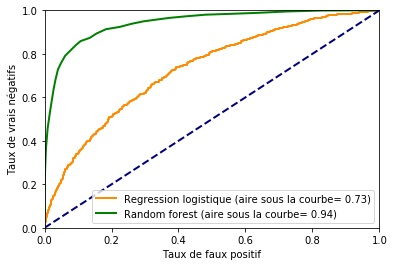

In [408]:
scores_logistic = model.predict_proba(X_Test)
fpr_logistic, tpr_logistic, thresholds_logistic = metrics.roc_curve(df_wta_test['Y'],scores_logistic[:,1],pos_label=1)
roc_auc_logistic=metrics.auc(fpr_logistic,tpr_logistic)

scores_rf = clf_rf.predict_proba(X_Test)
fpr_rf, tpr_rf, thresholds_rf = metrics.roc_curve(df_wta_test['Y'],scores_rf[:,1],pos_label=1)
roc_auc_rf=metrics.auc(fpr_rf,tpr_rf)

plt.figure()
lw=2
plt.plot(fpr_logistic,tpr_logistic,color='darkorange',lw=lw,label='Regression logistique (aire sous la courbe= %0.2f)'%roc_auc_logistic)
plt.plot(fpr_rf,tpr_rf,color='green',lw=lw,label='Random forest (aire sous la courbe= %0.2f)'%roc_auc_rf)

plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('Taux de faux positif')
plt.ylabel('Taux de vrais négatifs')
plt.legend(loc="lower right")
plt.show()

## Conclusion

On dispose finalement de peu d'information sur chaque joueur neanmoins on obtient des resultats satisfaisants avec le Random forest.

### Difficultes

Le calcul du taux de victoire a poser differents problemes, notamment du a la date des match avant 2003 (plusieurs match d'un joueurs le meme jour).
Il a fallu modifier les variables pour oter l'information sur le vainqueur, binariser les variables categorielles et gerer les nombreuses donnees manquantes.

### Axes d'amelioration

Le taux de victoire apporte une grande ameioration a la prediction du Random forest.
On pourrait creer d'autres variables de la meme maniere ou completer les donnees. 
Exemples : age du joueur, s'il joue dans son pays, son taux de victoire sur chaque surface ou chaque tournoi.

Le calcul du taux de victoire merite d'etre optimise.
On pourrait developper la partie statistiques descriptives et egalement faire une validation croisee en separant les donnees en plusieurs parties (pas seulement 2 comme on l'a fait).